In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import plotly_express as px
from sklearn import preprocessing, model_selection, neighbors, metrics, svm, pipeline

In [2]:
dataset = pd.read_excel("data/Recrutamento.xlsx")
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [3]:
dataset["salary"] = dataset["salary"].fillna(value=0)
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

<Axes: xlabel='status', ylabel='salary'>

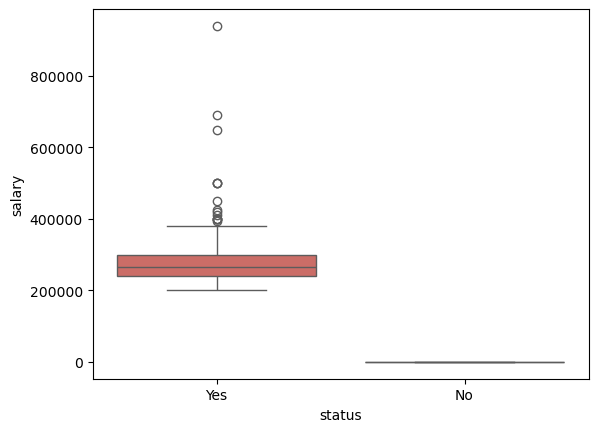

In [4]:
sb.boxplot(data=dataset, x="status", y="salary", palette="hls", hue="status")

<Axes: xlabel='hsc_p'>

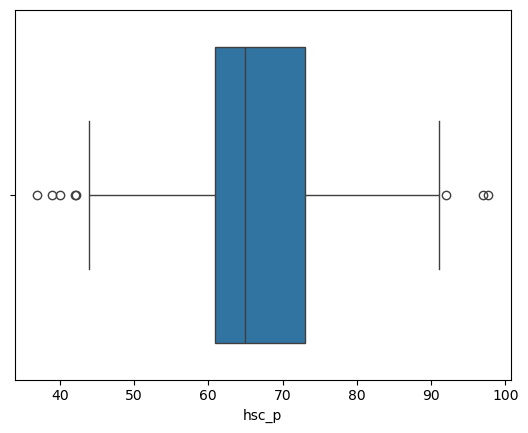

In [5]:
sb.boxplot(x=dataset["hsc_p"])

<Axes: xlabel='hsc_p', ylabel='Count'>

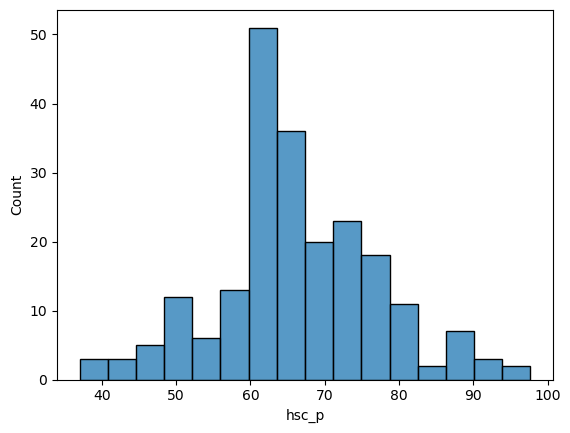

In [6]:
sb.histplot(data=dataset, x="hsc_p")

<Axes: xlabel='degree_p'>

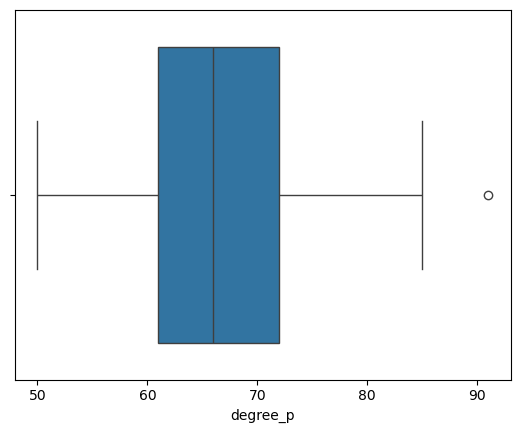

In [7]:
sb.boxplot(x=dataset["degree_p"])

<Axes: xlabel='degree_p', ylabel='Count'>

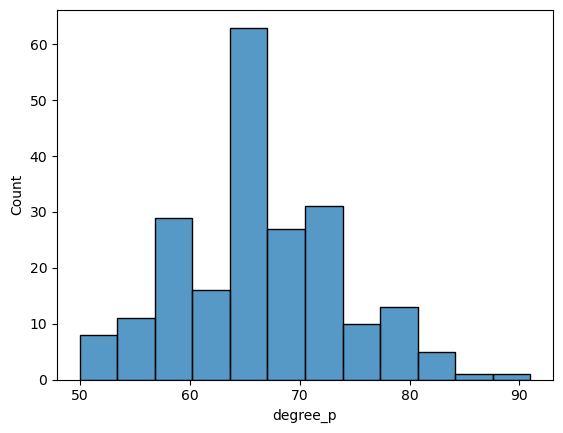

In [8]:
sb.histplot(data=dataset, x="degree_p")

<Axes: xlabel='etest_p'>

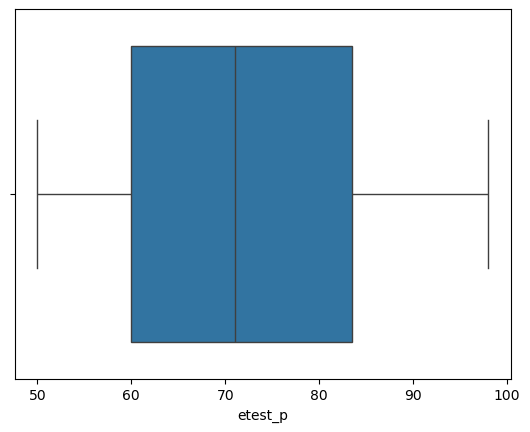

In [9]:
sb.boxplot(x=dataset["etest_p"])

<Axes: xlabel='etest_p', ylabel='Count'>

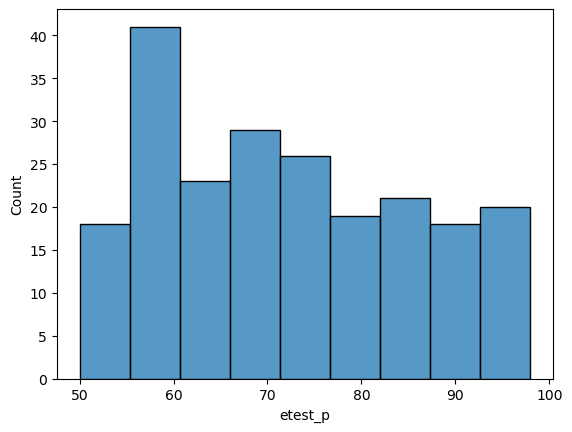

In [10]:
sb.histplot(data=dataset, x="etest_p")

<Axes: xlabel='mba_p'>

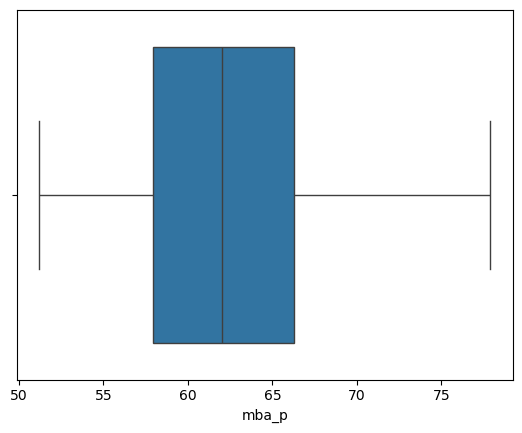

In [11]:
sb.boxplot(x=dataset["mba_p"])

<Axes: xlabel='mba_p', ylabel='Count'>

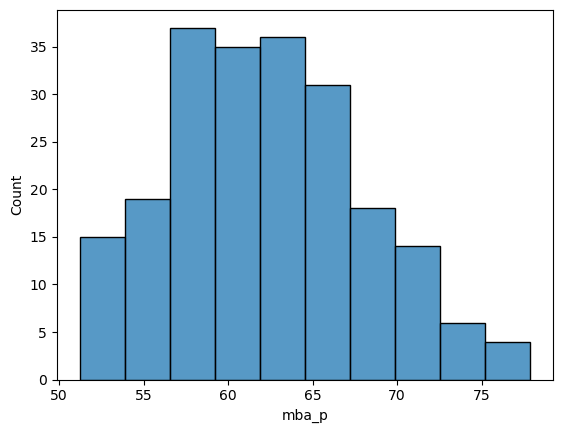

In [12]:
sb.histplot(data=dataset, x="mba_p")

<Axes: xlabel='salary'>

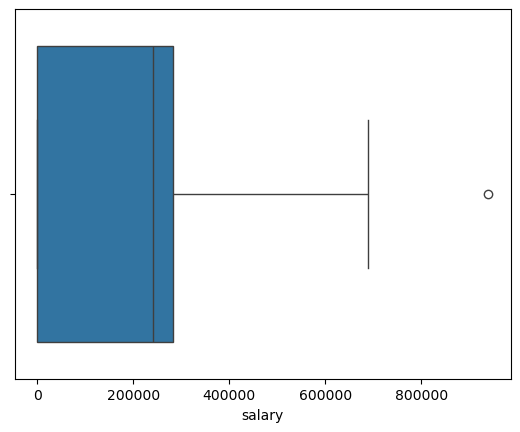

In [13]:
sb.boxplot(x=dataset["salary"])

<Axes: xlabel='salary', ylabel='Count'>

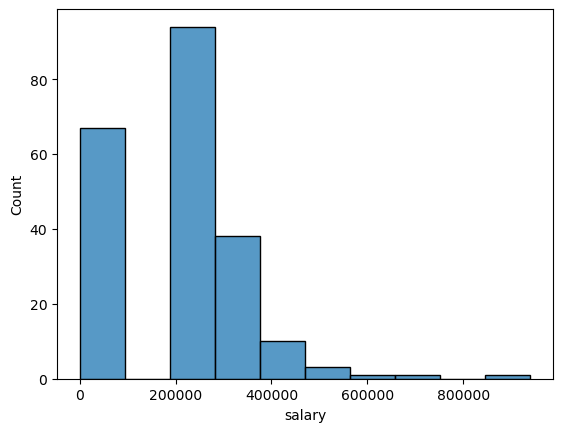

In [14]:
sb.histplot(data=dataset, x="salary")

Text(36.25, 0.5, '')

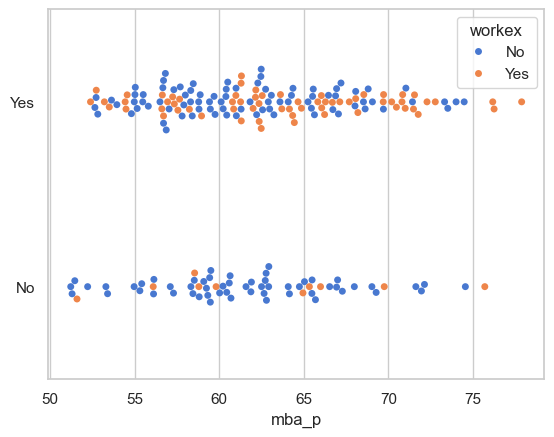

In [15]:
sb.set_theme(style="whitegrid", palette="muted")
ax = sb.swarmplot(data=dataset, x="mba_p", y="status", hue="workex")
ax.set_ylabel("")

In [16]:
px.violin(dataset, y="salary", x="specialisation", color="gender", box=True, points="all")

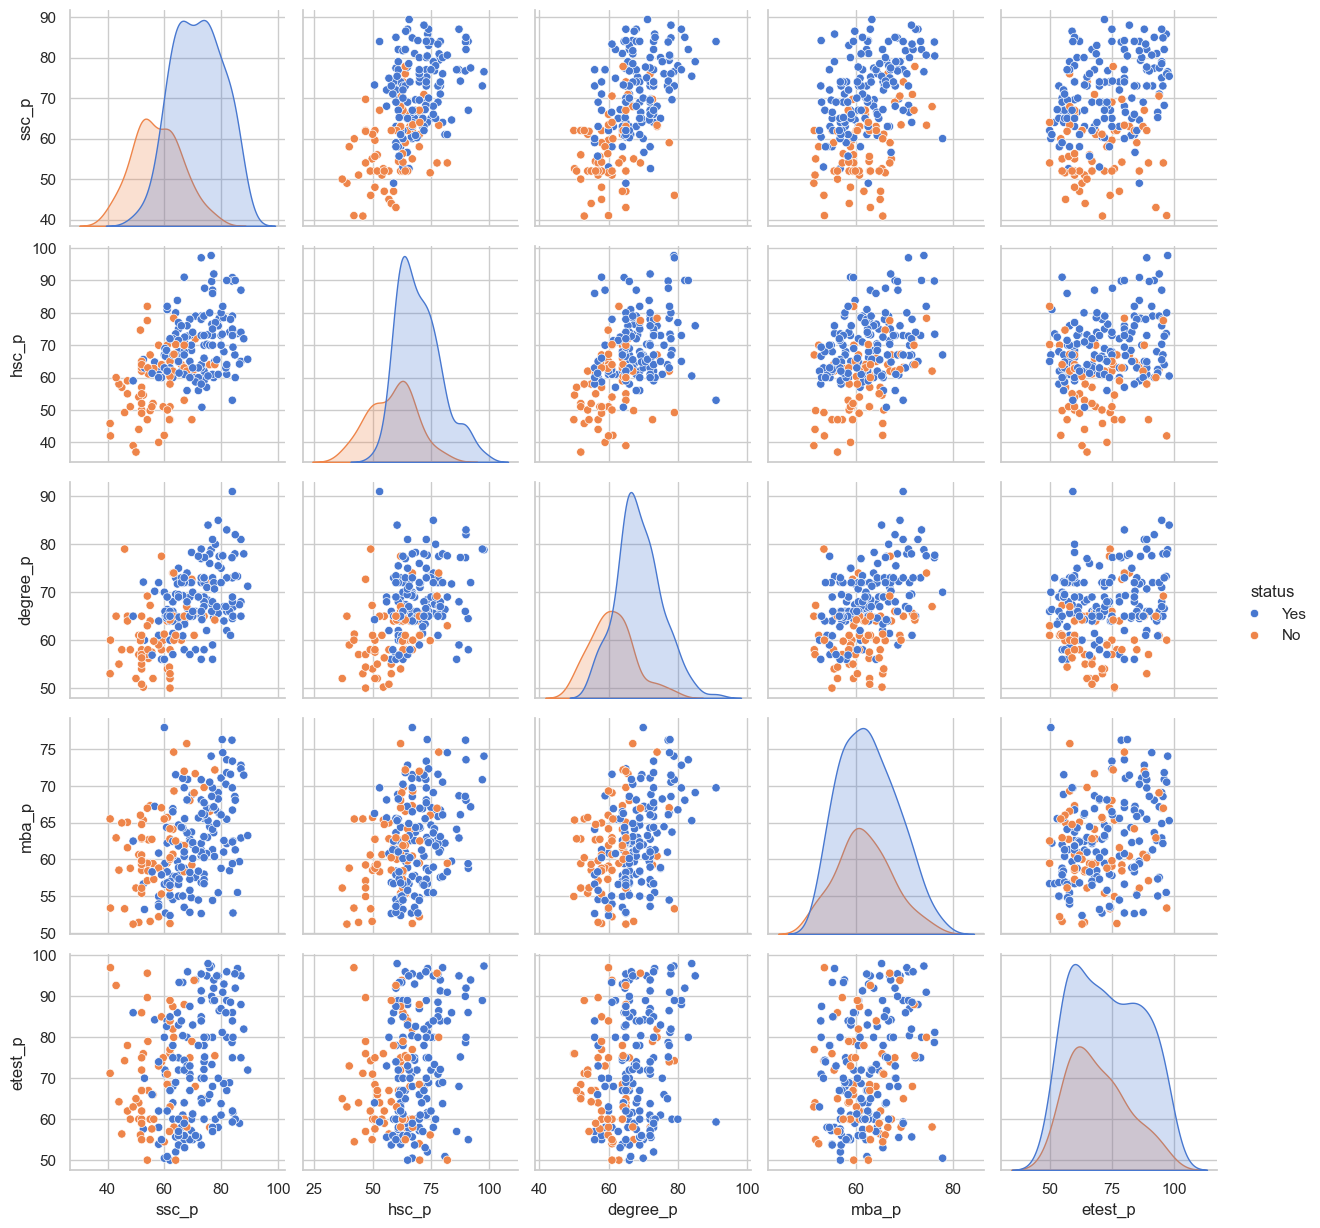

In [17]:
num_vars = ["ssc_p", "hsc_p", "degree_p", "mba_p", "etest_p"]
sb.pairplot(dataset, hue="status", vars=num_vars)

<Axes: >

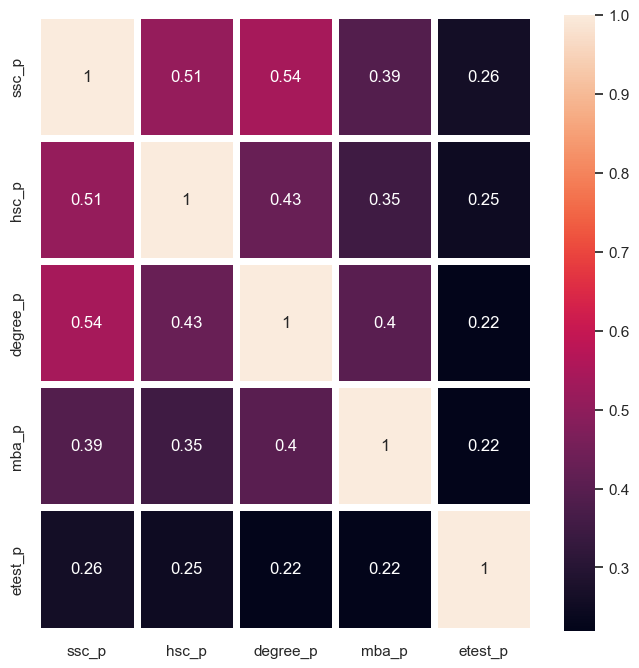

In [18]:
correlation_matrix = dataset[num_vars].corr().round(2)

fig, ax = plt.subplots(figsize=(8, 8))

sb.heatmap(data=correlation_matrix, annot=True, linewidths=5, ax=ax)

In [19]:
encoder = preprocessing.LabelEncoder()
binary_categorical_columns = ["gender", "workex", "specialisation", "status"]
for col in binary_categorical_columns:
    dataset[col] = encoder.fit_transform(dataset[col])

dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [20]:
dummy_hsc_c = pd.get_dummies(dataset["hsc_s"], prefix="dummy")
dummy_degree_t = pd.get_dummies(dataset["degree_t"], prefix="dummy")

final_dataset = pd.concat([dataset, dummy_hsc_c, dummy_degree_t], axis=1)
final_dataset.drop(["hsc_s", "degree_t", "salary"], axis=1, inplace=True)

categorical_columns =  dummy_hsc_c.columns.to_list() + dummy_degree_t.columns.to_list()
for col in categorical_columns:
    final_dataset[col] = encoder.fit_transform(final_dataset[col])

final_dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,3,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,4,1,56.00,Central,52.00,Central,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,5,1,85.80,Central,73.60,Central,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


<Axes: >

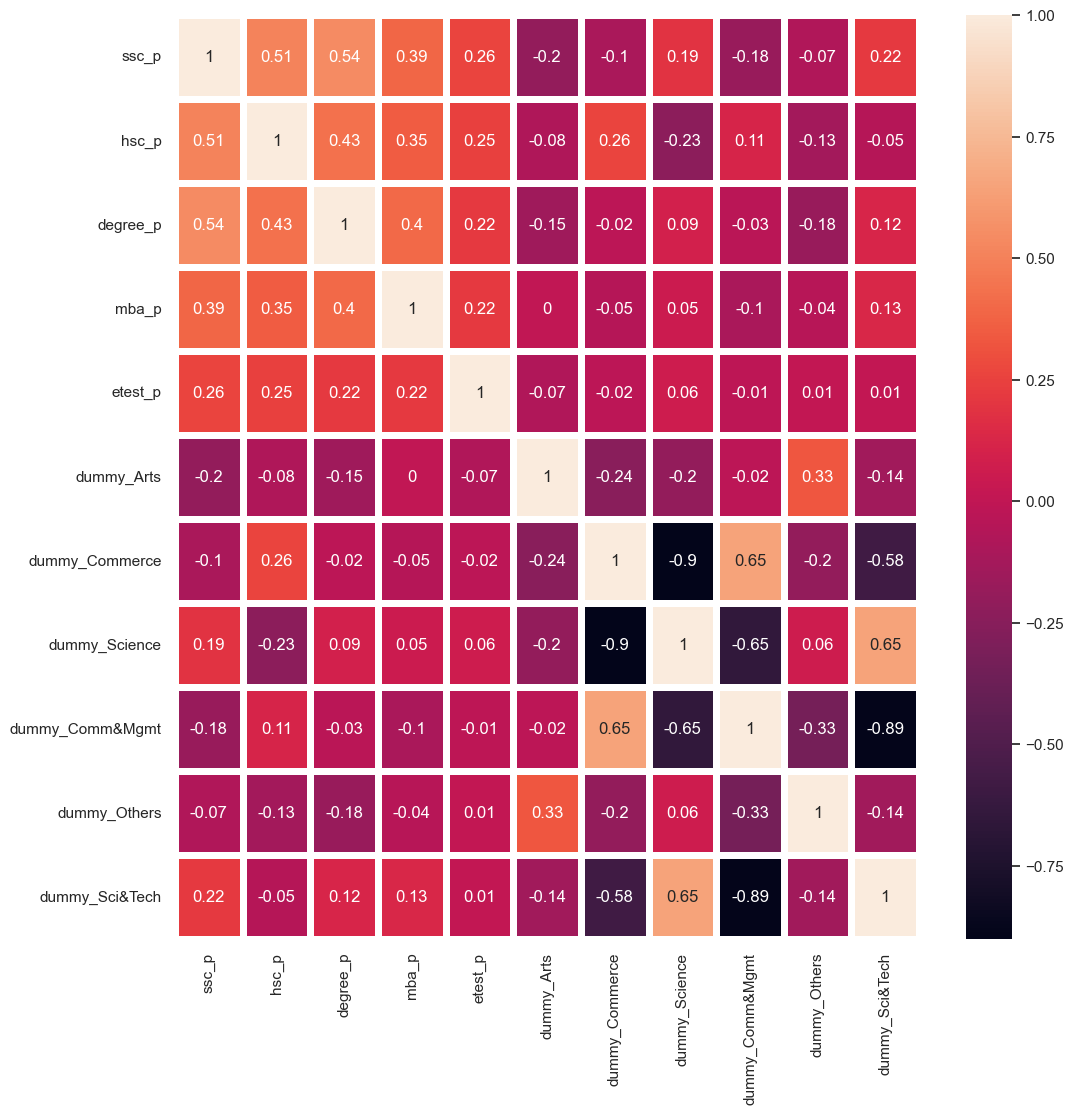

In [21]:
num_vars = num_vars + categorical_columns
correlation_matrix = final_dataset[num_vars].corr().round(2)
fig, ax = plt.subplots(figsize=(12, 12))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=5, ax=ax)

In [22]:
X = final_dataset[["ssc_p", "hsc_p", "degree_p", "workex", "mba_p"]]
y = final_dataset["status"]
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Text(0, 0.5, 'Error Rate')

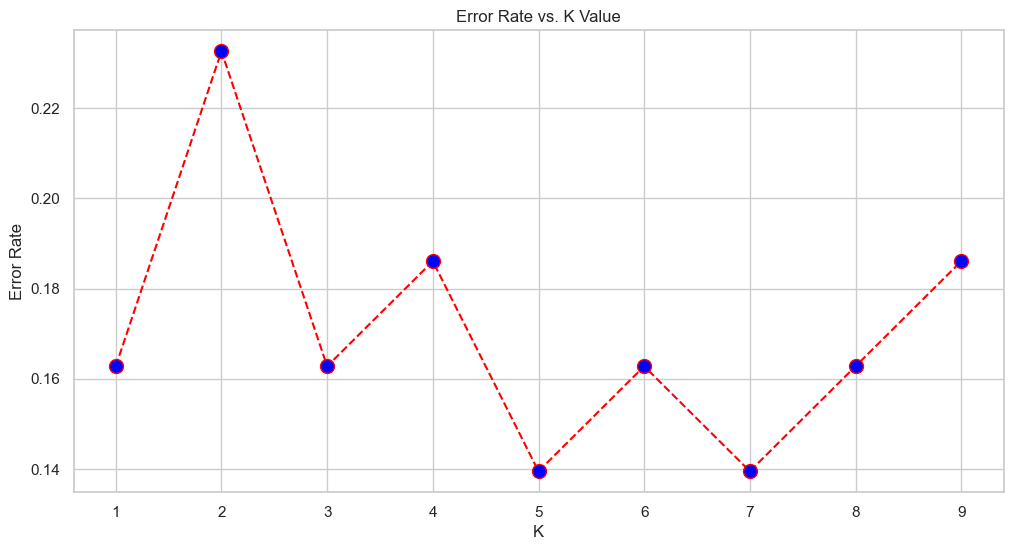

In [24]:
error_rates = []
for i in range(1, 10):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    error_rates.append(np.mean(predictions != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error_rates, color="red", linestyle="dashed", marker="o", markerfacecolor="blue", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [25]:
model = neighbors.KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

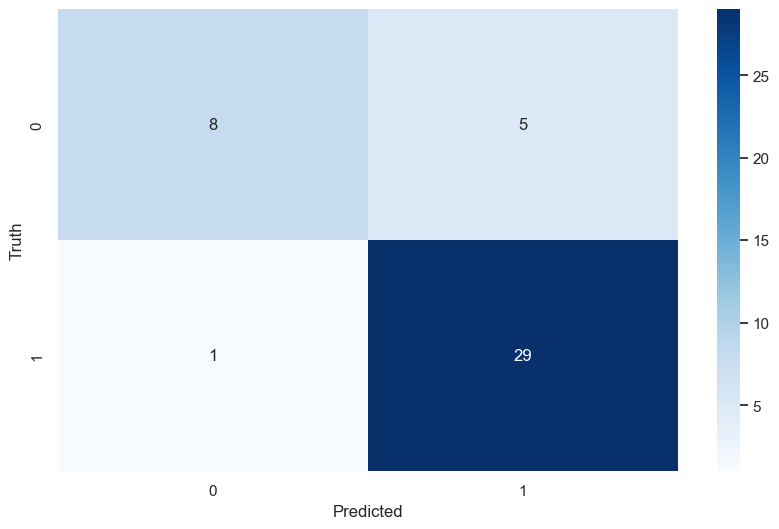

In [31]:
predictions = model.predict(X_test)

cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 6))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [36]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.85      0.97      0.91        30

    accuracy                           0.86        43
   macro avg       0.87      0.79      0.82        43
weighted avg       0.86      0.86      0.85        43



In [28]:
svm_model = svm.LinearSVC(C=1)
svm_model.fit(X_train, y_train)

LinearSVC(C=1)

In [34]:
svm_predictions = svm_model.predict(X_test)
print(metrics.classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.88      0.93      0.90        30

    accuracy                           0.86        43
   macro avg       0.85      0.81      0.83        43
weighted avg       0.86      0.86      0.86        43



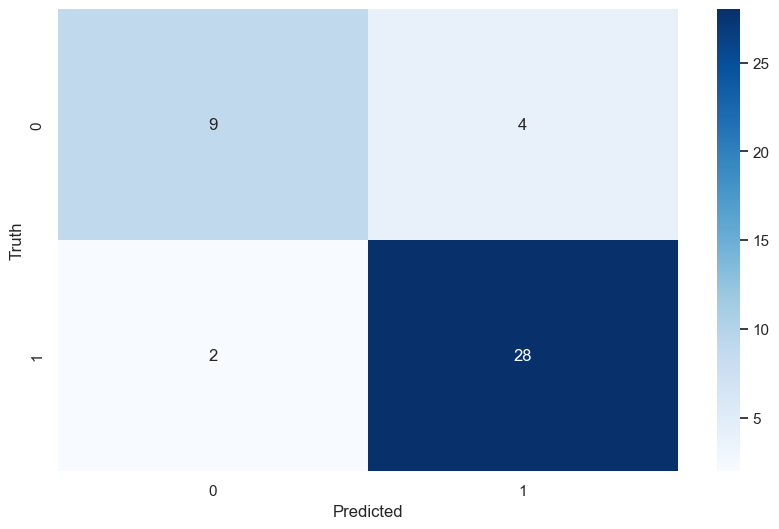

In [32]:
cm = metrics.confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(10, 6))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()